# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [4]:
import numpy
import matplotlib.pyplot as plt

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/lena.png` and show it:

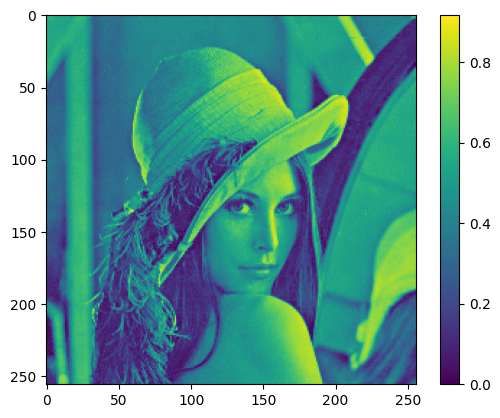

In [5]:
img = plt.imread('data/lena.png')
plt.imshow(img)
plt.colorbar() 
plt.show()

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical $3 \times 3$ Prewitt filters:

In [11]:
def prewitt_v(img):
    gy = numpy.zeros(img.shape)
    n = (3 - 1) // 2
    filter = numpy.array ([
        [-1,-1,-1],
        [0,0,0],
        [1,1,1]
    ])
    for p in numpy.ndindex(img.shape[0]-2*n, img.shape[1]-2*n):
        neighborhood_sum = 0
        for q in numpy.ndindex(3,3):
            weight = filter[q[0], q[1]]
            neighborhood_sum += weight * img[p[0]+q[0],p[1]+q[1]]
            neighborhood_mean = neighborhood_sum/6
        gy[p[0]+n,p[1]+n] = neighborhood_mean
    return gy

def prewitt_h(img):
    gx = numpy.zeros(img.shape)
    n = (3 - 1) // 2
    filter = numpy.array ([
        [-1,0,1],
        [-1,0,1],
        [-1,0,1]
    ])
    for p in numpy.ndindex(img.shape[0]-2*n, img.shape[1]-2*n):
        neighborhood_sum = 0
        for q in numpy.ndindex(3,3):
            weight = filter[q[0], q[1]]
            neighborhood_sum += weight * img[p[0]+q[0],p[1]+q[1]]
            neighborhood_mean = neighborhood_sum/6
        gx[p[0]+n,p[1]+n] = neighborhood_mean
    return gx
    

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

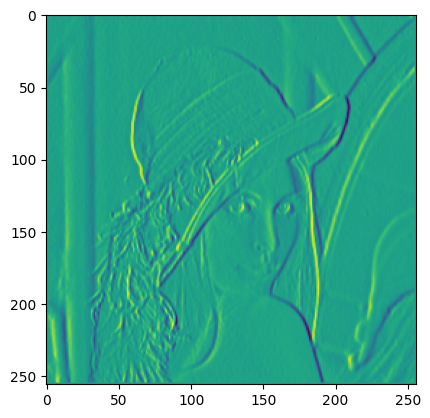

In [12]:
prewittv = plt.imshow(prewitt_v(img))
prewitth = plt.imshow(prewitt_h(img))

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/lena_prewitt_h.tiff` and `data/lena_prewitt_v.tiff`:

In [14]:
import skimage.io
lena_prewitt_h = skimage.io.imread('data/lena_prewitt_h.tiff')
lena_prewitt_v = skimage.io.imread('data/lena_prewitt_v.tiff')
assert numpy.allclose(prewitt_h(img), lena_prewitt_h, atol=1/255)
assert numpy.allclose(prewitt_h(img), lena_prewitt_h, atol=1/255)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/lena_prewitt_gradmag.tiff`:

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical $3 \times 3$ Sobel filtering, respectively:

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/lena_sobel_h.tiff` and `data/lena_sobel_v.tiff`: